In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from MLLibrary import KNearestNeighbourClassifier, Utilities, StandardizationScale, Metrics

In [4]:
x_data, y_data = Utilities.load_data('data/Classification_train.csv',start_x = 1,start_y = 0,end_y = 1)
x_train,y_train, x_cv,y_cv = Utilities.split_data(70, x_data, y_data)

print(f'Train data: {x_train.shape} {y_train.shape}')
print(f'CV data: {x_cv.shape} {y_cv.shape}')

Train data: (21000, 784) (21000, 1)
CV data: (9000, 784) (9000, 1)


In [5]:
scaler = StandardizationScale()
x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.transform(x_cv)

print(f'Train data: {x_train_scaled.shape}')
print(f'CV data: {x_cv_scaled.shape}')

Train data: (21000, 784)
CV data: (9000, 784)


In [15]:
model = KNearestNeighbourClassifier(K=3)
model.fit(x_train_scaled, y_train)
yhat = model.predict(x_cv_scaled)

acc = Metrics.classifier_accuracy(yhat, y_cv)
print(f'Accuracy: {acc:.2f}')

Accuracy: 96.38


In [7]:
K = [3,5,8,10,20,30,40,50,80,100]
models = []
accuracies = []
for i,k in enumerate(K):
  print(f'K: {k}')
  models.append(KNearestNeighbourClassifier(K=k))
  models[i].fit(x_train_scaled, y_train)

  yhat = models[i].predict(x_cv_scaled)
  accuracies.append(Metrics.classifier_accuracy(yhat, y_cv))


K: 3
K: 5
K: 8
K: 10
K: 20
K: 30
K: 40
K: 50
K: 80
K: 100


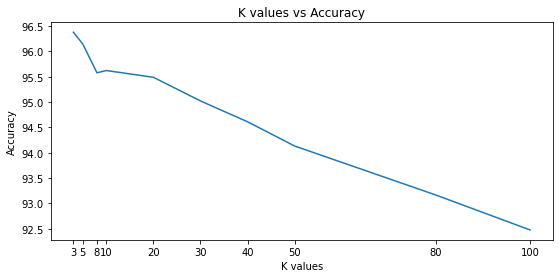

In [14]:
plt.figure(figsize=(9,4))
plt.plot(K,accuracies)
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.xticks(K)
plt.title('K values vs Accuracy')
plt.show()